In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


In [2]:
df = pandas.read_parquet("X_train.parquet")

In [3]:
df.head()

value  period
id time                  
0  0    -0.005564       0
   1     0.003705       0
   2     0.013164       0
   3     0.007151       0
   4    -0.009979       0

In [6]:
ids = np.unique(df.index.get_level_values("id"))
ids.shape[0]

10001

In [7]:
values, counts = np.unique(df.index.get_level_values("id"), return_counts=True)

In [8]:
counts.max()

3478

(array([ 221.,  688., 1149., 1436., 1496., 1462., 1463., 1118.,  739.,
         229.]),
 array([1258., 1480., 1702., 1924., 2146., 2368., 2590., 2812., 3034.,
        3256., 3478.]),
 <BarContainer object of 10 artists>)

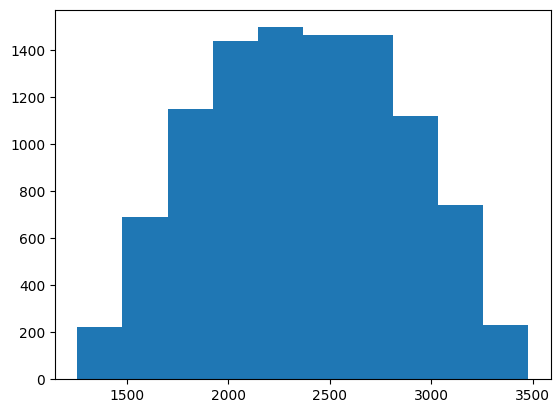

In [64]:
plt.hist(counts)

<BarContainer object of 10001 artists>

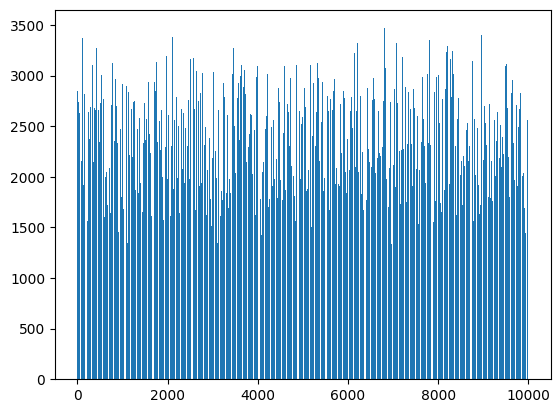

In [63]:
plt.bar(values, counts)

In [38]:
np.unique(df["period"])

array([0, 1], dtype=int64)

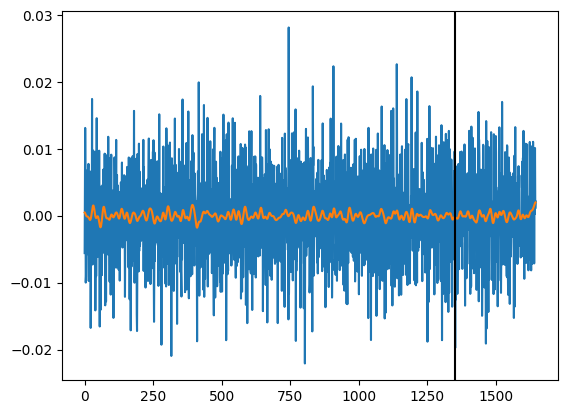

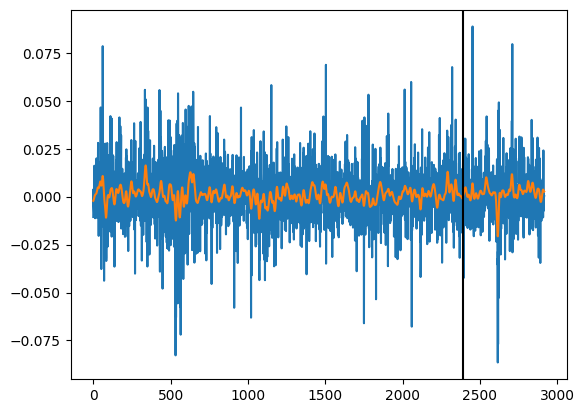

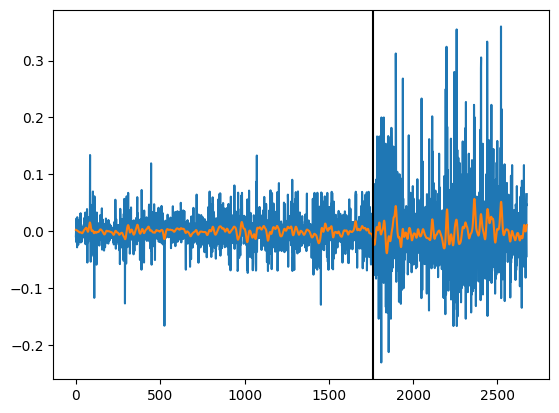

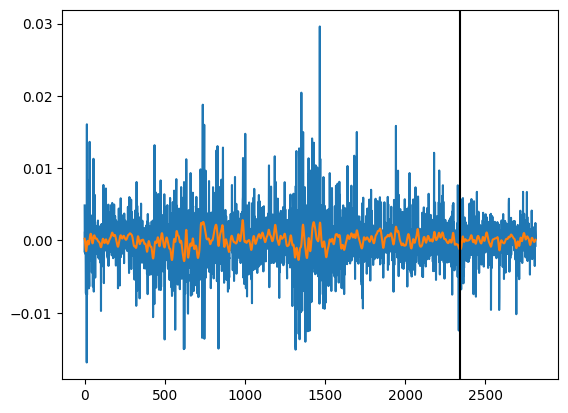

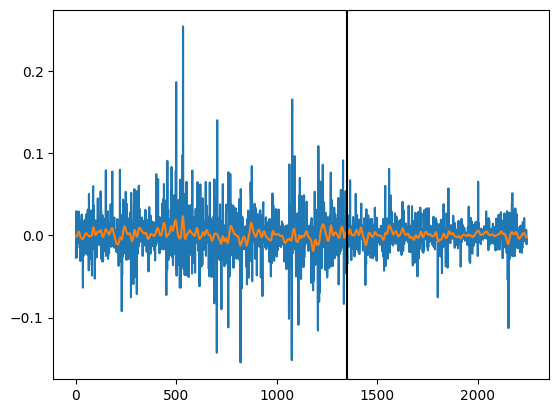

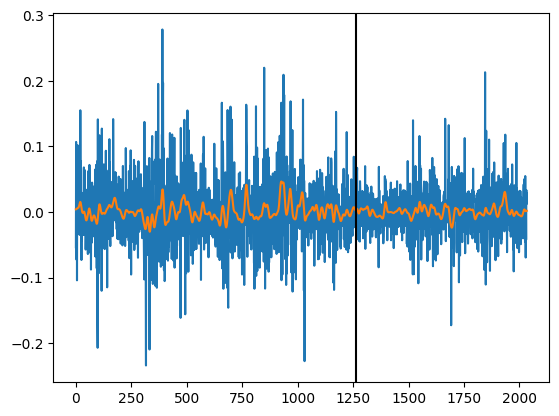

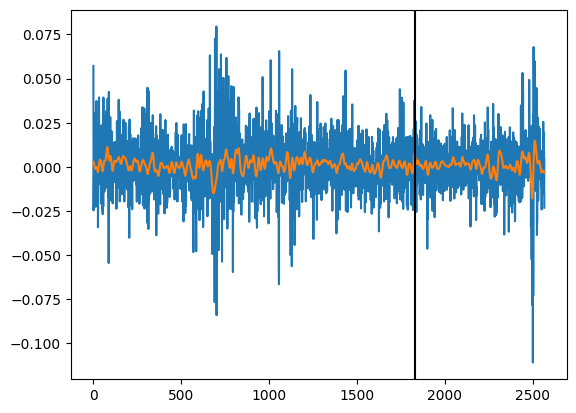

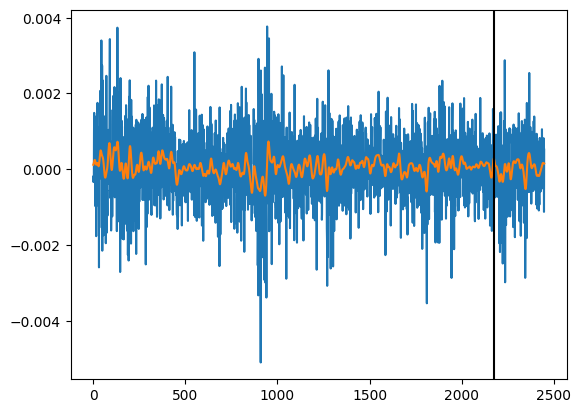

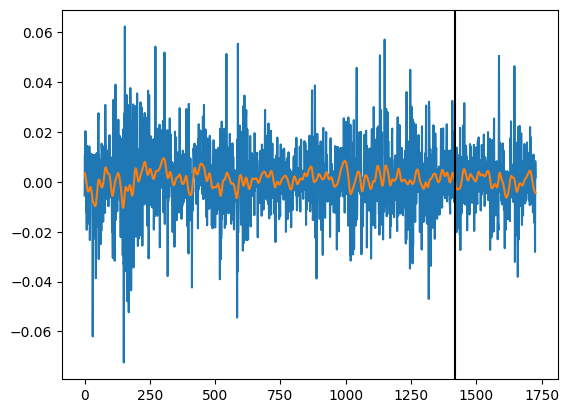

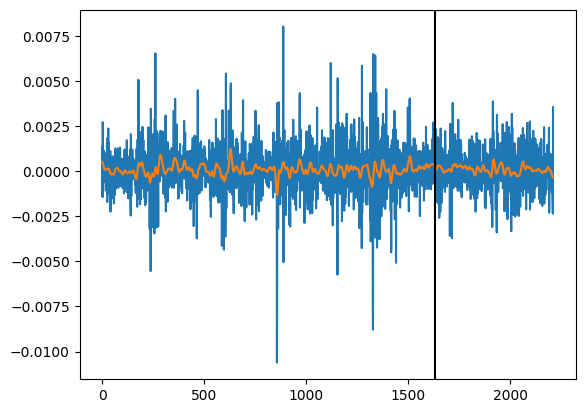

In [55]:
for i in range(10):

    s1 = df.loc[(1000*i)]["value"].to_numpy()
    p1 = df.loc[(1000*i)]["period"].to_numpy()

    plt.plot(s1)

    s1_f = gaussian_filter1d(s1, 5)
    
    plt.plot(s1_f)

    for break_point in np.argwhere(p1[:-1] - p1[1:]).flatten():
        plt.axvline(break_point, color="black")

    plt.show()

In [40]:
s1.shape

(2212,)

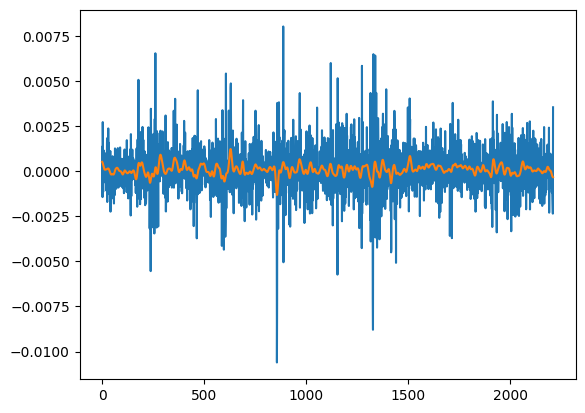

In [50]:
plt.plot(s1)
plt.plot(s1_f)

In [106]:
import torch

In [43]:
max_seq_length = counts.max()
window_size = 2

In [122]:
value = torch.tensor(df.loc[0]["value"])
period = torch.tensor(df.loc[0]["period"])

In [123]:
item = torch.zeros([max_seq_length, 1+(2*window_size)])

In [124]:
sequence_length = value.shape[0]

In [125]:
item[:sequence_length, 0] = value

In [127]:
for i in range(0, window_size):
    item[:sequence_length, i+1] = torch.roll(value, i+1)

for i in range(0, window_size):
    item[:sequence_length, i+1+window_size] = torch.roll(value, -(i+1))

In [137]:
item[:sequence_length, 2][:5]

tensor([ 0.0011,  0.0022, -0.0056,  0.0037,  0.0132])

In [119]:
value[:5]

array([-0.00556448,  0.00370513,  0.01316445,  0.00715094, -0.00997896])

In [128]:
mask = torch.ones(max_seq_length, dtype=bool)

mask[sequence_length:] = False

In [129]:
sequence_length

1645

In [131]:
mask[1645]

tensor(False)

In [134]:


mask = torch.ones(max_seq_length, dtype=bool)
mask[sequence_length-window_size:] = False
mask[:window_size] = False

In [140]:
mask[1642]

tensor(True)